# Univariate Visualizations

Uni-variate (single variable) visualizations are used to better understand one-dimensional data (think `pandas Series`) in the dataset. 

In this section, we will look at techniques to understand the **distribution** of each **feature**. Distribution of a feature, _simply put_, is the frequency of each value of the variable. 

We know from previous discussion that **`.value_counts()`** method on a `pandas Series` gives us the **frequency distribution** of each value in the `Series`. 

We will use the **World Bank dataset**, which contains information about countries and social statistics.
<!-- 
````{card} 

**Boston Housing Dataset**

^^^

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns: 

| Column | Description |
| --- | --- |
| CRIM | per capita crime rate by town |
| ZN | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS | proportion of non-retail business acres per town.
| CHAS | Charles River dummy variable (1 if tract bounds river; 0 otherwise)
| NOX | nitric oxides concentration (parts per 10 million)
| RM | average number of rooms per dwelling
| AGE | proportion of owner-occupied units built prior to 1940
| DIS | weighted distances to five Boston employment centres
| RAD | index of accessibility to radial highways
| TAX | full-value property-tax rate per $10,000
| PTRATIO | pupil-teacher ratio by town
| B | $1000 \ times (B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
| LSTAT | % lower status of the population
| MEDV | Median value of owner-occupied homes in $1000's

+++
Source:  The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978. 
```` -->

In [1]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt

sns.set_style('whitegrid')

data = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/data/world_bank.csv', index_col=0)
data.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


## Bar Plots

**Bar plots** are used to visualize the frequency distribution of <i><u>**features that take on a small set of unique values**</u></i>. Such features are more often categorical features as opposed to numerical features.

Visualizing categorical features is easy. We can use **`.value_counts()`** method to get the frequency distribution of each value in the feature. This frequency distribution can be plotted using a **bar chart**. 

In [2]:
val_counts = data['Continent'].value_counts()
print(val_counts)

Africa        47
Europe        43
Asia          34
N. America    18
Oceania       13
S. America    11
Name: Continent, dtype: int64


In `seaborn` the method to make a bar chart is **`barplot()`**. The method takes in two arguments: `x` and `y`. 

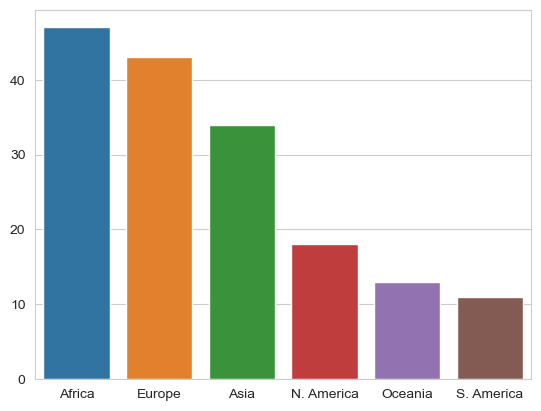

In [3]:
sns.barplot(x=val_counts.index, y=val_counts.values);

Note that the plots above are **incomplete**. If you show this plot to someone, they will not be able to understand what the plot is about. 

To _complete_ the plot, so it is understandable, we need to add atleast a title, axis labels and, depending on context, a legend.

## Axis labels and Title 

To add axis labels and title, we need to assign the plot object returned by `sns.barplot` to a variable and then use **`.set()`** method on the plot object.


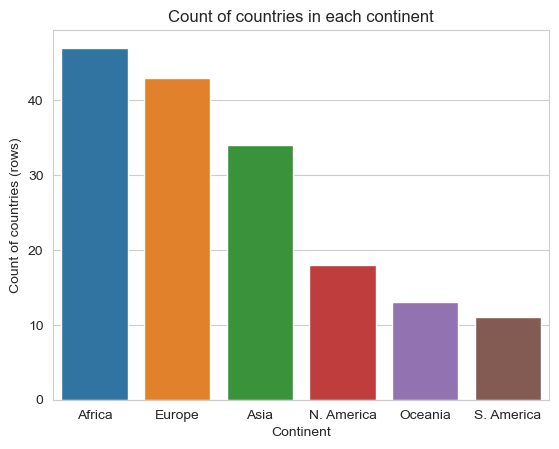

In [4]:
ax = sns.barplot(x=val_counts.index, y=val_counts.values);

ax.set(xlabel='Continent', ylabel='Count of countries (rows)', title='Count of countries in each continent');

Note that we have used **`.set()`** method on the plot object, returned by **`sns.barplot()`** method, and passed the arguments `xlabel`, `ylabel` and `title` to the method.

Now, the plot is "complete" and can be understood by someone who has not seen the data. 

<hr/>

**Bar plots don't scale**. If you try to plot a feature (categorical or numerical) with a lot of unique values, the plot will be unreadable. Yes, even with a title and axis labels!

Here is an example: 

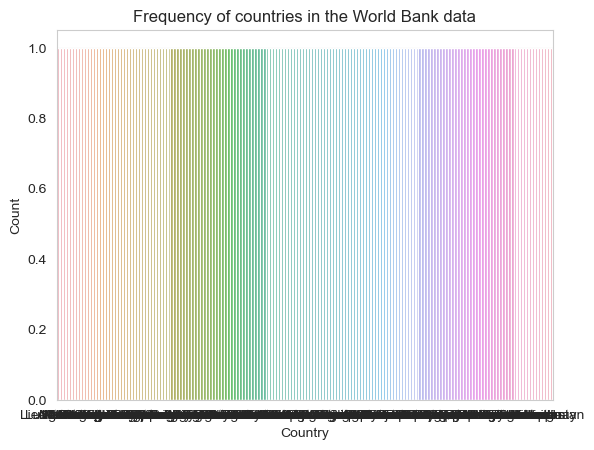

In [5]:
val_counts = data['Country'].value_counts();

ax = sns.barplot(x=val_counts.index, y=val_counts.values);

ax.set(xlabel='Country', ylabel='Count', title='Frequency of countries in the World Bank data');

The plot above is unreadable. We can't make out the labels on the x-axis. This is because there are too many unique values in the `country` feature.

There is no easy way to fix this for categorical features. For numerical features, however, there is a way.

<!--To make the plot readable, we need to **rotate** the x-axis labels.

## Rotating x-axis labels

To rotate the x-axis labels, we need to use the **`.set_xticklabels()`** method on the plot object. -->

## Histograms

Histograms _look_ very similar to bar plots. However, they are different in a subtle but critical way. 

Histograms solve the problem of plotting a feature with a lot of unique values by **binning** the values. 

Binning is the process of dividing the range of values of a feature into **bins**. Each bin represents a range of values. The height of the bar in a histogram represents the number of values in the bin. In most cases, the bins are of equal width.

For example, if we have a feature with values ranging from 0 to 100, we can divide the range into 10 bins of width 10 each. The first bin will contain values from 0 to 10, the second bin will contain values from 10 to 20 and so on.


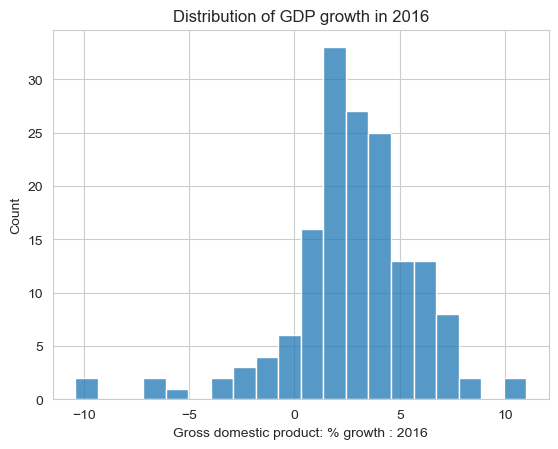

In [6]:
col = "Gross domestic product: % growth : 2016"

ax = sns.histplot(data=data, x=col);

ax.set(title="Distribution of GDP growth in 2016");



By default, `sns.histplot` will try to infer the bin edges from the data. However, it is possible to set the bin edges explicitly. This can be useful when comparing multiple distributions.

## Box Plots

<img align="right" width="60%" src="https://ds100.org/course-notes-su23/visualization_1/images/boxplot.png">

**Box plots** display distributions using information about quartiles.

A quartile represents a 25% portion of the data. We say that: 

* The first quartile (Q1) repesents the 25th percentile – 25% of the data lies below the first quartile 

* The second quartile (Q2) represents the 50th percentile, also known as the median – 50% of the data lies below the second quartile 

* The third quartile (Q3) represents the 75th percentile – 75% of the data lies below the third quartile.

In a box plot, the lower extent of the box lies at Q1, while the upper extent of the box lies at Q3. The horizontal line in the middle of the box corresponds to Q2 (equivalently, the median).

The **Inter-Quartile Range** (IQR) measures the spread of the middle \% of the distribution, calculated as the ($3^{rd}$ Quartile $-$ $1^{st}$ Quartile).

The **whiskers** of a box-plot are the two points that lie at the [$1^{st}$ Quartile $-$($1.5 \times$ IQR)], and the [$3^{rd}$ Quartile $+$ ($1.5 \times$ IQR)]. They are the lower and upper ranges of “normal” data (the points excluding outliers). Subsequently, the outliers are the data points that fall beyond the whiskers, or further than (
$1.5 \times$ IQR) from the extreme quartiles.

count    159.000000
mean       2.780503
std        3.106862
min      -10.400000
25%        1.450000
50%        2.900000
75%        4.500000
max       11.000000
Name: Gross domestic product: % growth : 2016, dtype: float64


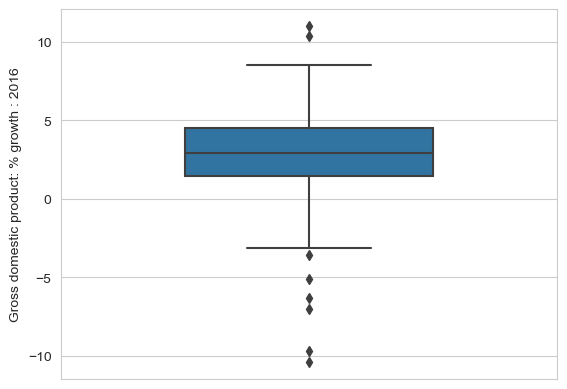

In [7]:
col = "Gross domestic product: % growth : 2016"

print(data[col].describe())
ax = sns.boxplot(data=data, y=col, width=0.5);

If it helps, you can think of the box plot as a birds-eye-view of histogram. Histogram as seeing a hill from the side, while box plot is seeing the hill from above through a drone or through a bird's eye. 

Also note that boxplot is to `.describe()` as barplot is to `.value_counts()`.